<a href="https://colab.research.google.com/github/jsale017/Capital_One_Stock_Evaluation/blob/main/CapitalOne_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install mpl_finance

In [ ]:
#pip install --upgrade pandas_datareader

# Analyzing Capital One Historical Stock Data with Machine Learning

### By: Jose Salerno
---



---



# Notebook Outline:

## 1. Motivation

## 2. Introduction

## 3. Exploratory Phase (EDA)

## 4. Models Creation

## 5. Visualizations

## 6. Limitations

## 7. Conclusion

## 8. References

---


---








# 1. Motivation:
As an undergraduate student at Florida International University, I developed a strong foundation in Finance, which led me to gain a comprehensive understanding of stock analysis and competitive performance evaluations. I had the opportunity to work on a project that involved analyzing a company's stock, which was a thrilling challenge that taught me how to use Excel and evaluate financial metrics such as the Capital Asset Pricing Model (CAPM), Dividend Discount Model (DDM), and Free Cash Flow Evaluations (FCF)

As a graduate student pursuing a Master of Science in Business Analytics degree at Questrom School of Business at Boston University, I am excited to continue honing my analytical and programming skills. So, I embarked on the challenge of analyzing the stock of Capital One company, which allowed me to apply my improved insights and predictions.

## Background:

1. What is the Beta?
    - Beta is an important metric that helps investors understand the relationship between a stock's volatility and the systematic risk of the overall market. Specifically, Beta measures a stock's volatility by analyzing its correlation with the S&P, which is used as a benchmark for the market. If a stock has a Beta value that's higher than 1, it's considered to be more volatile than the market. To calculate a stock's Beta Coefficient, we divide its covariance by the variance. By understanding a stock's Beta, investors can determine whether it movement is correlated with the market. For example, if the market goes up, a stock with a high Beta value would also go up.

2. What is the CAPM Model?
    - The Capital Asset Pricing Model (CAPM) is a financial model that aims to calculate the expected return on investment based on the level of risk involved. Beta describes the connection between an asset's expected return and systematic risk in this model. Beta measures the volatility of a stock or portfolio relative to the market as a whole. The higher the Beta, the higher the risk, and thus, the higher the expected return.

    - The CAPM establishes a linear relationship between the expected return on investment and the level of risk involved, as calculated by the Beta of a stock or portfolio, the risk-free rate (typically the Treasury bill rate), and the expected return on investment. By using this model, investors can make more informed decisions about where to invest their money based on their tolerance for risk and the potential return on investment.

3. What is Dividend Discounted Model (DDM)?
    - The Discounted Dividend Model (DDM) is a financial tool used by investors to estimate the value of a stock based on the potential returns from its future dividend payments.

    - The DDM operates on the principle that the current market price of a share of stock is equal to the sum of all its future dividend payments, discounted back to the present day. This discounted value is determined using a discount rate, which is the rate of return an investor expects to receive on their investment.

    - By using the DDM, investors can predict the future price of a stock by assuming that its dividends will grow at a fixed rate indefinitely. This allows investors to make informed decisions about whether to buy or sell a particular stock based on its expected future returns.

4. What is the Free Cash FLow Evaluation?
    - Free Cash Flow (FCF) is a financial metric that provides valuable insights into a company's financial health. Essentially, FCF represents the cash a company generates after accounting for expenses, including capital expenditures. However, unlike net income or earnings, FCF excludes non-cash expenses from the income statement.

    - By evaluating FCF, investors, analysts, and other stakeholders can gain a better understanding of a company's cash-generating ability, which is critical for its long-term success. For instance, a company with a positive FCF indicates that it has enough cash to invest in growth opportunities, pay dividends, reduce debt, or buy back shares.


---


# 2. Introduction

#### What is the aim of the project:

- The purpose of this project is to delve into the details of various financial metrics and gain an in-depth understanding of how they are calculated. Additionally, the project seeks to gain a comprehensive understanding of how Capital One's stock performs in the market and how competitive it is compared to other players in the market. By studying these factors, the project aims to provide a detailed analysis that can assist in making informed financial decisions when it comes to investing in the COF stock.

#### Who is the Capital One:
- Capital One is a highly reputable and well-known American financial institution that specializes in a range of financial services, including credit cards, auto loans, banking, and savings accounts. The company is committed to serving millions of customers across the United States and helping them achieve their financial goals. In addition to its core mission, Capital One is dedicated to improving the well-being of communities across the country by creating affordable housing, supporting black and Hispanic entrepreneurs, and more.

- As a company that relies on data to better serve its customers, Capital One is committed to collecting and analyzing vast amounts of customer data to enhance the customer experience. This allows the company to personalize services, protect against fraud and potential risks, and comply with state and federal regulations. Capital One's use of data is both ethical and responsible, helping to ensure that customers can trust the company with their financial information. To delve deeper into the success of the company, I decided to analyze its competitive standing in the stock market.



#### Data Source:
- Source: Yahoo Finance
- URL: https://finance.yahoo.com/quote/COF/

# 3. Exploratory Phase (EDA) and Cleaning

In [ ]:
# Importing necessary packages
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
# Retriving data from Yahoo Finance
start = '2018-01-01'
end = dt.datetime.now()
tickers = ['COF', '^GSPC']

data = yf.download(tickers, start=start, end=end, interval='1mo')

[*********************100%%**********************]  2 of 2 completed


In [ ]:
data = data.reset_index()

In [ ]:
data.head()

Date  Adj Close                    Close                     High  \
                    COF        ^GSPC         COF        ^GSPC         COF   
0 2018-01-01  93.190292  2823.810059  103.959999  2823.810059  106.500000   
1 2018-02-01  87.784958  2713.830078   97.930000  2713.830078  104.879997   
2 2018-03-01  86.269432  2640.870117   95.820000  2640.870117  101.440002   
3 2018-04-01  81.587738  2648.050049   90.620003  2648.050049   99.150002   
4 2018-05-01  84.630852  2705.270020   94.000000  2705.270020   97.870003   

                      Low                     Open                 Volume  \
         ^GSPC        COF        ^GSPC         COF        ^GSPC       COF   
0  2872.870117  98.750000  2682.360107  100.080002  2683.729980  51193200   
1  2835.959961  88.750000  2532.689941  103.769997  2816.449951  47921500   
2  2801.899902  92.389999  2585.889893   98.010002  2715.219971  44531300   
3  2717.489990  90.589996  2553.800049   95.529999  2633.449951  54039300   
4  2742.239990  86.949997  2594.620117   90.349998  2642.959961  64502000   

                
         ^GSPC  
0  77318690000  
1  79933970000  
2  76803890000  
3  70194700000  
4  76011820000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   (Date, )            72 non-null     datetime64[ns]
 1   (Adj Close, COF)    72 non-null     float64       
 2   (Adj Close, ^GSPC)  72 non-null     float64       
 3   (Close, COF)        72 non-null     float64       
 4   (Close, ^GSPC)      72 non-null     float64       
 5   (High, COF)         72 non-null     float64       
 6   (High, ^GSPC)       72 non-null     float64       
 7   (Low, COF)          72 non-null     float64       
 8   (Low, ^GSPC)        72 non-null     float64       
 9   (Open, COF)         72 non-null     float64       
 10  (Open, ^GSPC)       72 non-null     float64       
 11  (Volume, COF)       72 non-null     int64         
 12  (Volume, ^GSPC)     72 non-null     int64         
dtypes: datetime64[ns](1), float64(10), int64(2)
memory u

In [ ]:
data.describe()

Adj Close                    Close                     High  \
              COF        ^GSPC         COF        ^GSPC         COF   
count   72.000000    72.000000   72.000000    72.000000   72.000000   
mean    98.918086  3594.693193  104.576250  3594.693193  112.618056   
std     26.151497   698.850890   26.446887   698.850890   27.350527   
min     47.003143  2506.850098   50.419998  2506.850098   66.410004   
25%     81.867592  2923.339966   90.385002  2923.339966   94.642502   
50%     93.107952  3667.934937   98.969997  3667.934937  104.965000   
75%    113.763641  4184.327393  117.514997  4184.327393  123.754997   
max    157.125336  4766.180176  165.970001  4766.180176  177.949997   

                           Low                     Open               \
             ^GSPC         COF        ^GSPC         COF        ^GSPC   
count    72.000000   72.000000    72.000000   72.000000    72.000000   
mean   3708.546658   96.801389  3431.329037  104.451945  3570.664717   
std     705.822465   25.805133   679.289186   26.766876   697.468403   
min    2708.949951   38.000000  2191.860107   46.430000  2476.959961   
25%    2961.827454   84.582502  2788.915039   90.589998  2905.997498   
50%    3815.549927   91.965000  3537.854980   99.485001  3627.825073   
75%    4312.065063  105.190001  4068.604858  111.754997  4185.267334   
max    4818.620117  155.460007  4560.000000  165.960007  4778.140137   

             Volume                
                COF         ^GSPC  
count  7.200000e+01  7.200000e+01  
mean   6.042483e+07  8.757628e+10  
std    1.880996e+07  1.721338e+10  
min    3.571710e+07  5.696825e+10  
25%    4.930625e+07  7.727867e+10  
50%    5.643885e+07  8.384082e+10  
75%    6.517905e+07  9.312289e+10  
max    1.337959e+08  1.621854e+11



---



# 4. Model Creations

### Calculating the Beta of the Market

In [ ]:
# Obtaining the log returns of the adjusted close
log_returns_adj_close = np.log(data['Adj Close']/data['Adj Close'].shift())
print(log_returns_adj_close)

         COF     ^GSPC
0        NaN       NaN
1  -0.059753 -0.039726
2  -0.017415 -0.027252
3  -0.055796  0.002715
4   0.036620  0.021378
..       ...       ...
67 -0.133556 -0.017875
68 -0.048235 -0.049946
69  0.042761 -0.022225
70  0.097471  0.085424
71  0.155370  0.032606

[72 rows x 2 columns]


In [ ]:
# Calculating coveriance
cov = log_returns_adj_close.cov()

In [ ]:
# Variance of the SPY
var = log_returns_adj_close['^GSPC'].var()
print('The variance calculated for the S&P is:', round(var, 3))

The variance calculated for the S&P is: 0.003


In [ ]:
# Calculating Beta
Beta = cov.loc['COF','^GSPC']/var
print("The Beta calculated for the COF Stock:", round(Beta, 2))

The Beta calculated for the COF Stock: 1.52


In [ ]:
# Verifying accurate Beta
cov.loc['^GSPC']/var

COF      1.518363
^GSPC    1.000000
Name: ^GSPC, dtype: float64

### Spliting the Data to implement a Linear Regression Model

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
X = log_returns_adj_close[['^GSPC']].values
y = log_returns_adj_close['COF'].values

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

# Imputing zero for missing values
imputer = SimpleImputer(strategy='constant', fill_value = 0)
X_train_imputed = imputer.fit_transform(X_train)

lr = LinearRegression()
lr.fit(X_train_imputed, y_train)
y_prediction = lr.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(y_train, y_prediction, squared=False)
print(f"The training data RMSE is {lin_rmse:.3f}")

The training data RMSE is 0.087


In [ ]:
## Utilizing Cross Validation to futher inspect the performance of the LR Model
from sklearn.model_selection import cross_val_score
cv_rmse = cross_val_score(lr, X_train_imputed, y_train, scoring='neg_root_mean_squared_error', cv=5)
-cv_rmse

array([0.06448359, 0.15593451, 0.08321404, 0.03577472, 0.07798441])

In [ ]:
## Removing the null values from the y_test
null = np.isnan(y_test)
X_test_cleaned = X_test[~null]
y_test_cleaned = y_test[~null]

# Imputing zero for missing values
X_test_cleaned_imputed = imputer.transform(X_test_cleaned)

y_test_prediction = lr.predict(X_test_cleaned_imputed)
lin_rmse_test = mean_squared_error(y_test_cleaned, y_test_prediction, squared=False)
print(f"The cleaned test data RMSE is {lin_rmse_test:.3f}")

The cleaned test data RMSE is 0.057


### Calculating the Capital Asset Pricing Model

In [ ]:
## Calculating the Risk Free Rate
risk_free_rate = yf.Ticker('^TNX').get_info()['previousClose']*0.01
risk_free_rate

0.0393

In [ ]:
## Measuring expected Return utilizing Capital Asset Pricing Model
market_return = .10     # Market Return is about 10% per year as by S&P500
expected_return = risk_free_rate + Beta*(market_return - risk_free_rate)
print(f"The Capital Asset Pricing Return is {expected_return:.3f}")

The Capital Asset Pricing Return is 0.131


### Calculating the Gordon Growth Model

In [ ]:
ticker = yf.Ticker('COF')
COF = ticker.actions
COF

,Dividends,Stock Splits
Date,,
1995-05-04 00:00:00-04:00,0.026667,0.0
1995-08-04 00:00:00-04:00,0.026667,0.0
1995-11-03 00:00:00-05:00,0.026667,0.0
1996-02-02 00:00:00-05:00,0.026667,0.0
1996-04-26 00:00:00-04:00,0.026667,0.0
...,...,...
2022-11-10 00:00:00-05:00,0.600000,0.0
2023-02-03 00:00:00-05:00,0.600000,0.0
2023-05-12 00:00:00-04:00,0.600000,0.0


In [ ]:
COF_stock_split = COF['Stock Splits'].to_numpy()
COF_stock_split

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
## Replacing zeros with one in the stock splits historical data
COF_stock_split = np.where(COF_stock_split == 0, 1, COF_stock_split)
COF_stock_split

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
## Adding the adjusted stock split into the DataFrame
COF['adjusted_stocksplit'] = COF_stock_split.tolist()

In [ ]:
## Calculating adjusted dividends
COF['adjusted_dividends'] = COF['Dividends'] * COF['adjusted_stocksplit']

In [ ]:
COF['year'] = COF.index.year

In [ ]:
COF = COF.groupby(by=["year"]).sum()

In [ ]:
## Calculating the dividend change
COF['div_PCT_Change'] = COF['adjusted_dividends'].pct_change(fill_method = 'ffill')
COF

,Dividends,Stock Splits,adjusted_stocksplit,adjusted_dividends,div_PCT_Change
year,,,,,
1995,0.080001,0.0,3.0,0.080001,NaN
1996,0.106668,0.0,4.0,0.106668,0.333333
1997,0.106668,0.0,4.0,0.106668,0.000000
1998,0.106668,0.0,4.0,0.106668,0.000000
1999,0.108334,3.0,7.0,0.108334,0.015619
2000,0.108000,0.0,4.0,0.108000,-0.003083
2001,0.108000,0.0,4.0,0.108000,0.000000
2002,0.109000,0.0,4.0,0.109000,0.009259
2003,0.109000,0.0,4.0,0.109000,0.000000


In [ ]:
## Calculating the Market Risk Premium
market_risk_premium = market_return - risk_free_rate
print(f"The Market Risk Premium is {market_risk_premium:.3f}")

The Market Risk Premium is 0.061


In [ ]:
## Calculating the Cost of Equity
Cost_of_equity = Beta * market_risk_premium + risk_free_rate
print(f"The Cost of Equity is {Cost_of_equity:.3f}")

The Cost of Equity is 0.131


In [ ]:
## What is the median growth of dividend change
median_growth = COF['div_PCT_Change'].median(skipna=True)
median_growth

0.0

In [ ]:
## Obtaininf the fitst dividend offered by Capital One
first_dividend = COF.at[2023, 'Dividends']
first_dividend

2.4

In [ ]:
## Calculating the expected future dividend -- As the calculation state, the expected future dividend remains the same
expected_future_div = first_dividend * (1+median_growth)
print(f"The Expected Future Dividend is {expected_future_div:.3f}")

The Expected Future Dividend is 2.400


In [ ]:
## Calculating the fair share price of COF
fair_share_price = expected_future_div / (Cost_of_equity - median_growth)
print(f"The Fair Share Price is {fair_share_price:.3f}")

The Fair Share Price is 18.256


In [ ]:
## Capital One Stock Price today
COF_stock_price_today = ticker.history(period='today')
COF_stock_price_close = COF_stock_price_today.iloc[0]['Close']
COF_stock_price_close

129.67999267578125

In [ ]:
## Calculating the expected gain or loss of the stock for investors
expected_gain_loss = fair_share_price/COF_stock_price_close-1
print(f"The Expected Gain or Loss is {expected_gain_loss:.3f}")

The Expected Gain or Loss is -0.859


### Calculating the FCF Evaluation

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
values = pd.read_excel('/content/gdrive/MyDrive/COF_personal_project_Stock_Evaluation/COF_CashFlow.xlsx', sheet_name='Values')

In [ ]:
values

,Free Cash Flow,Interest Expense,Tax Provision,Pretax Income,Date
0,12875000,19412000,1880000,9240000,2022
1,11612000,16470000,3415000,15809000,2021
2,15989000,14716000,486000,3203000,2020
3,15752000,14994000,1341000,6874000,2019


In [ ]:
## Calculating the Free Cash Flow Evaluation
FCF = values['Free Cash Flow'] + values['Interest Expense'] * (1 - values['Tax Provision'] / values['Pretax Income'])

In [ ]:
values['FCF'] = FCFF.tolist()
values

,Free Cash Flow,Interest Expense,Tax Provision,Pretax Income,Date,FCF
0,12875000,19412000,1880000,9240000,2022,2.833737e+07
1,11612000,16470000,3415000,15809000,2021,2.452421e+07
2,15989000,14716000,486000,3203000,2020,2.847210e+07
3,15752000,14994000,1341000,6874000,2019,2.782093e+07




---



---



# 5. Visualizations

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['Open'][tickers],
                high=data['High'][tickers],
                low=data['Low'][tickers],
                close=data['Adj Close'][tickers],
                name=tickers) for tickers in tickers])

fig.update_layout(title='Candlestick Chart - Capital One and S&P500',
                  xaxis_title='Date',
                  yaxis_title='Stock Price',
                  xaxis_rangeslider_visible=True)

fig.show()

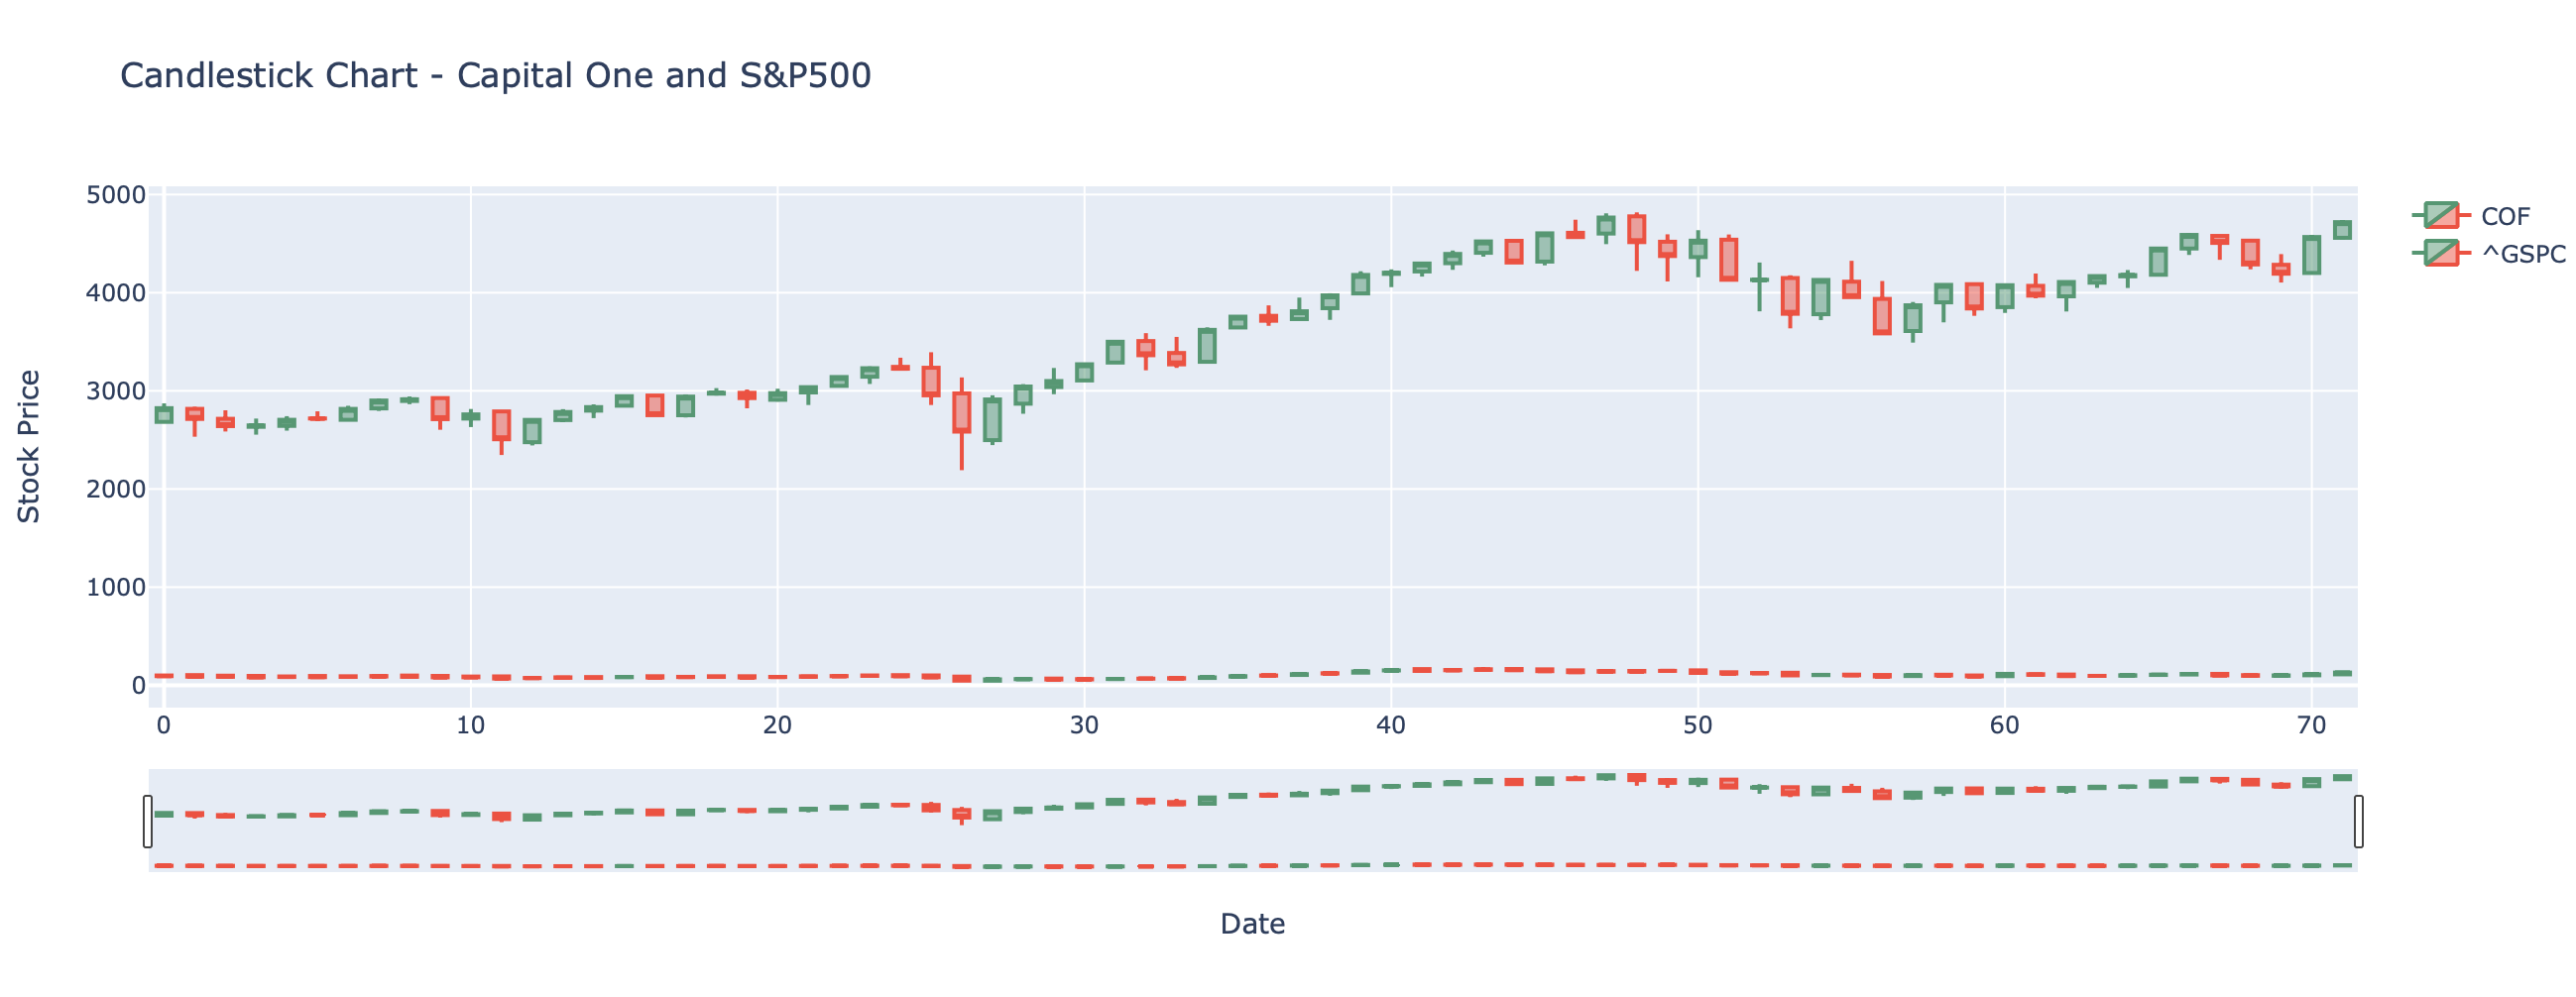

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(x=COF.index, y=COF['div_PCT_Change'], name='Dividend Percentage Change'))

fig.update_layout(
    title='Capital One Dividend Percentage Change Over Time',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Percentage Change'),
    showlegend=True
)

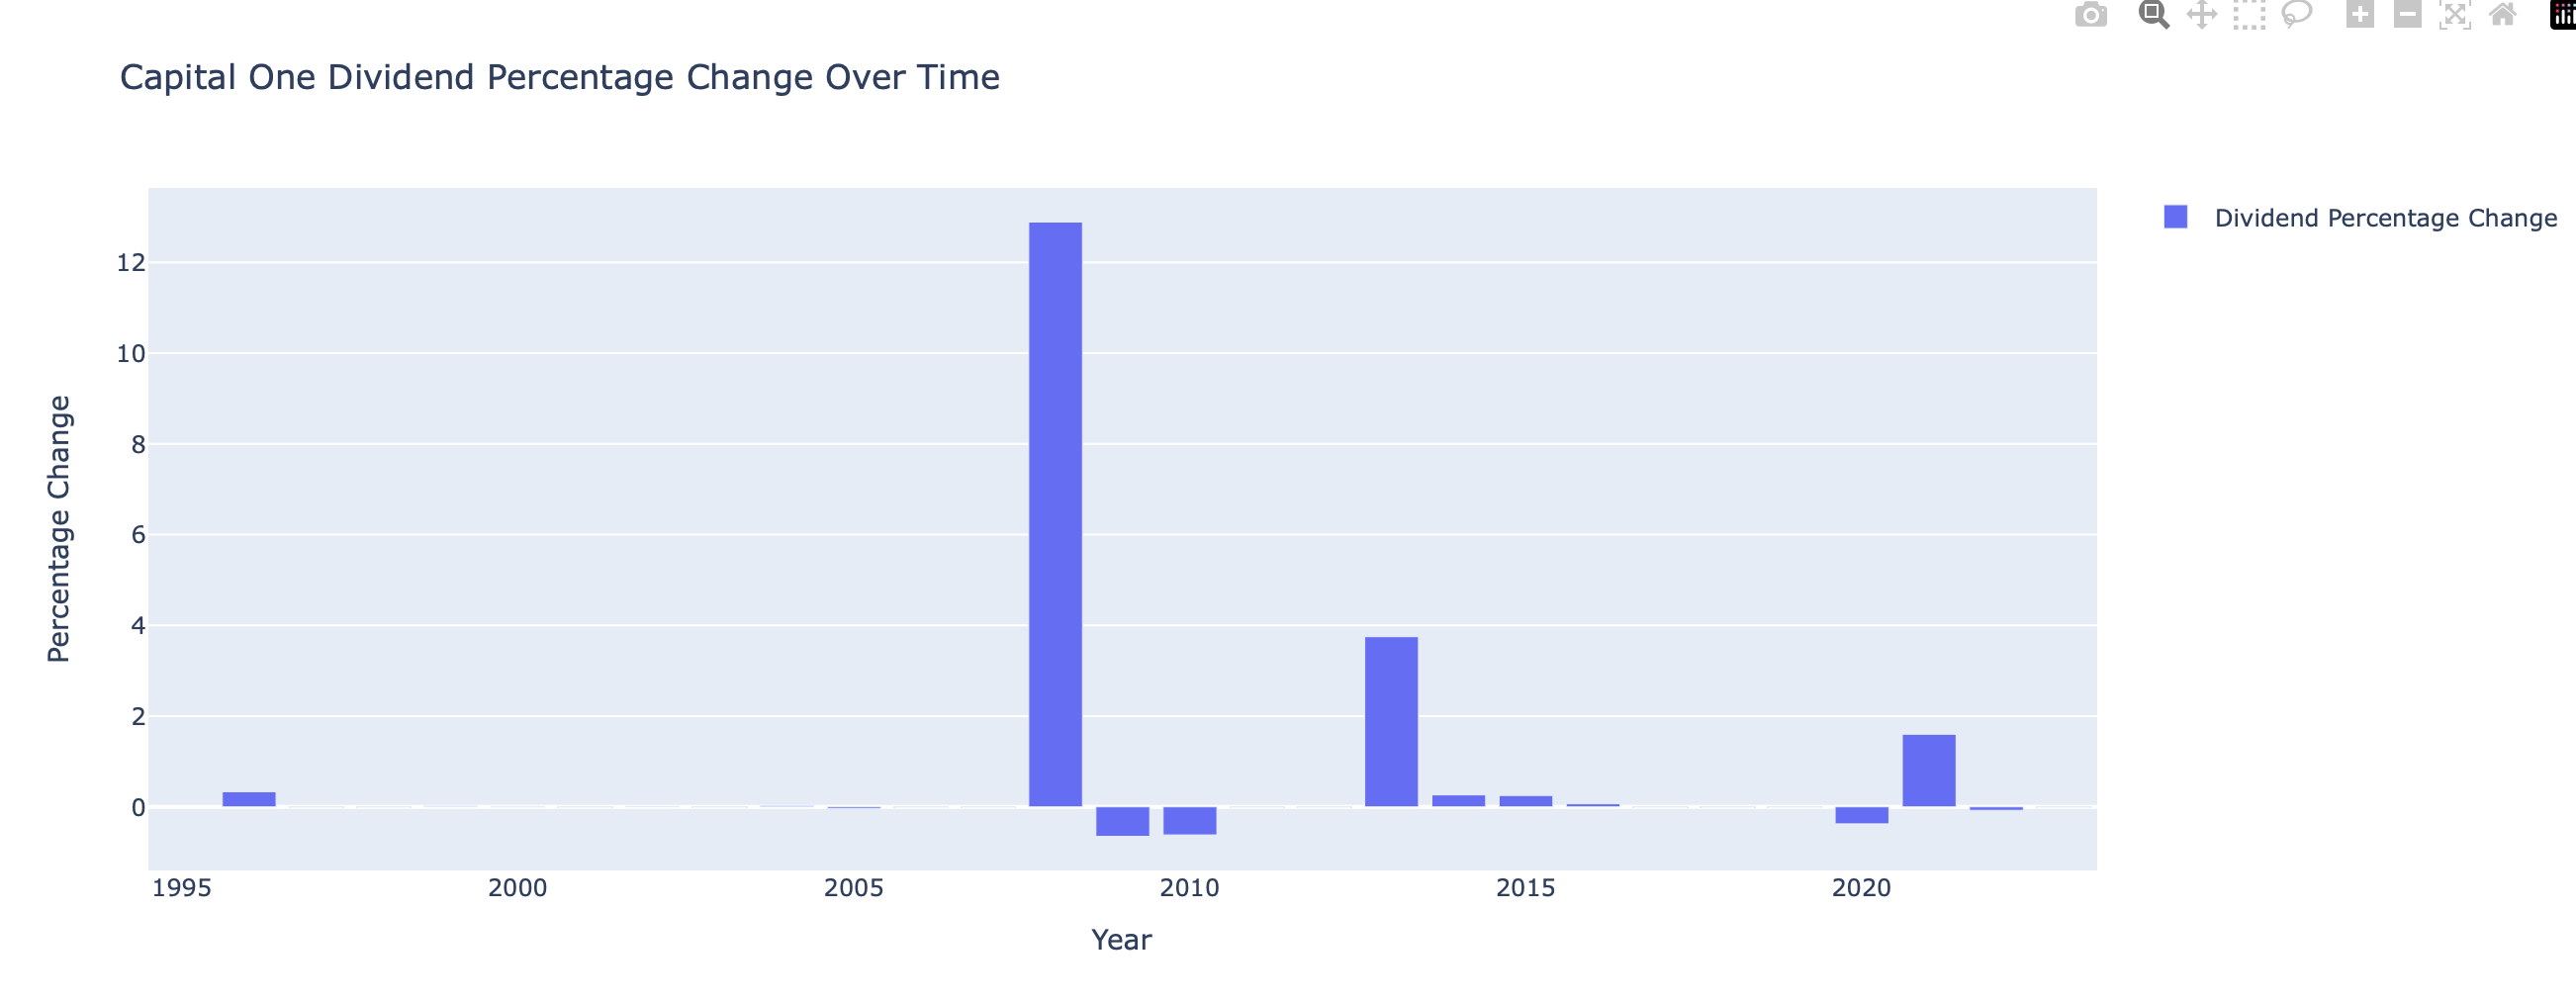

In [ ]:
fig = go.Figure()

for col in ['Free Cash Flow', 'Interest Expense', 'Tax Provision', 'Pretax Income', 'FCF']:
    fig.add_trace(go.Bar(x=values['Date'], y=values[col], name=col))

fig.update_layout(
    title='Capital One FCFF Over Time',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Amount'),
    barmode='stack',
    showlegend=True
)

fig.show()

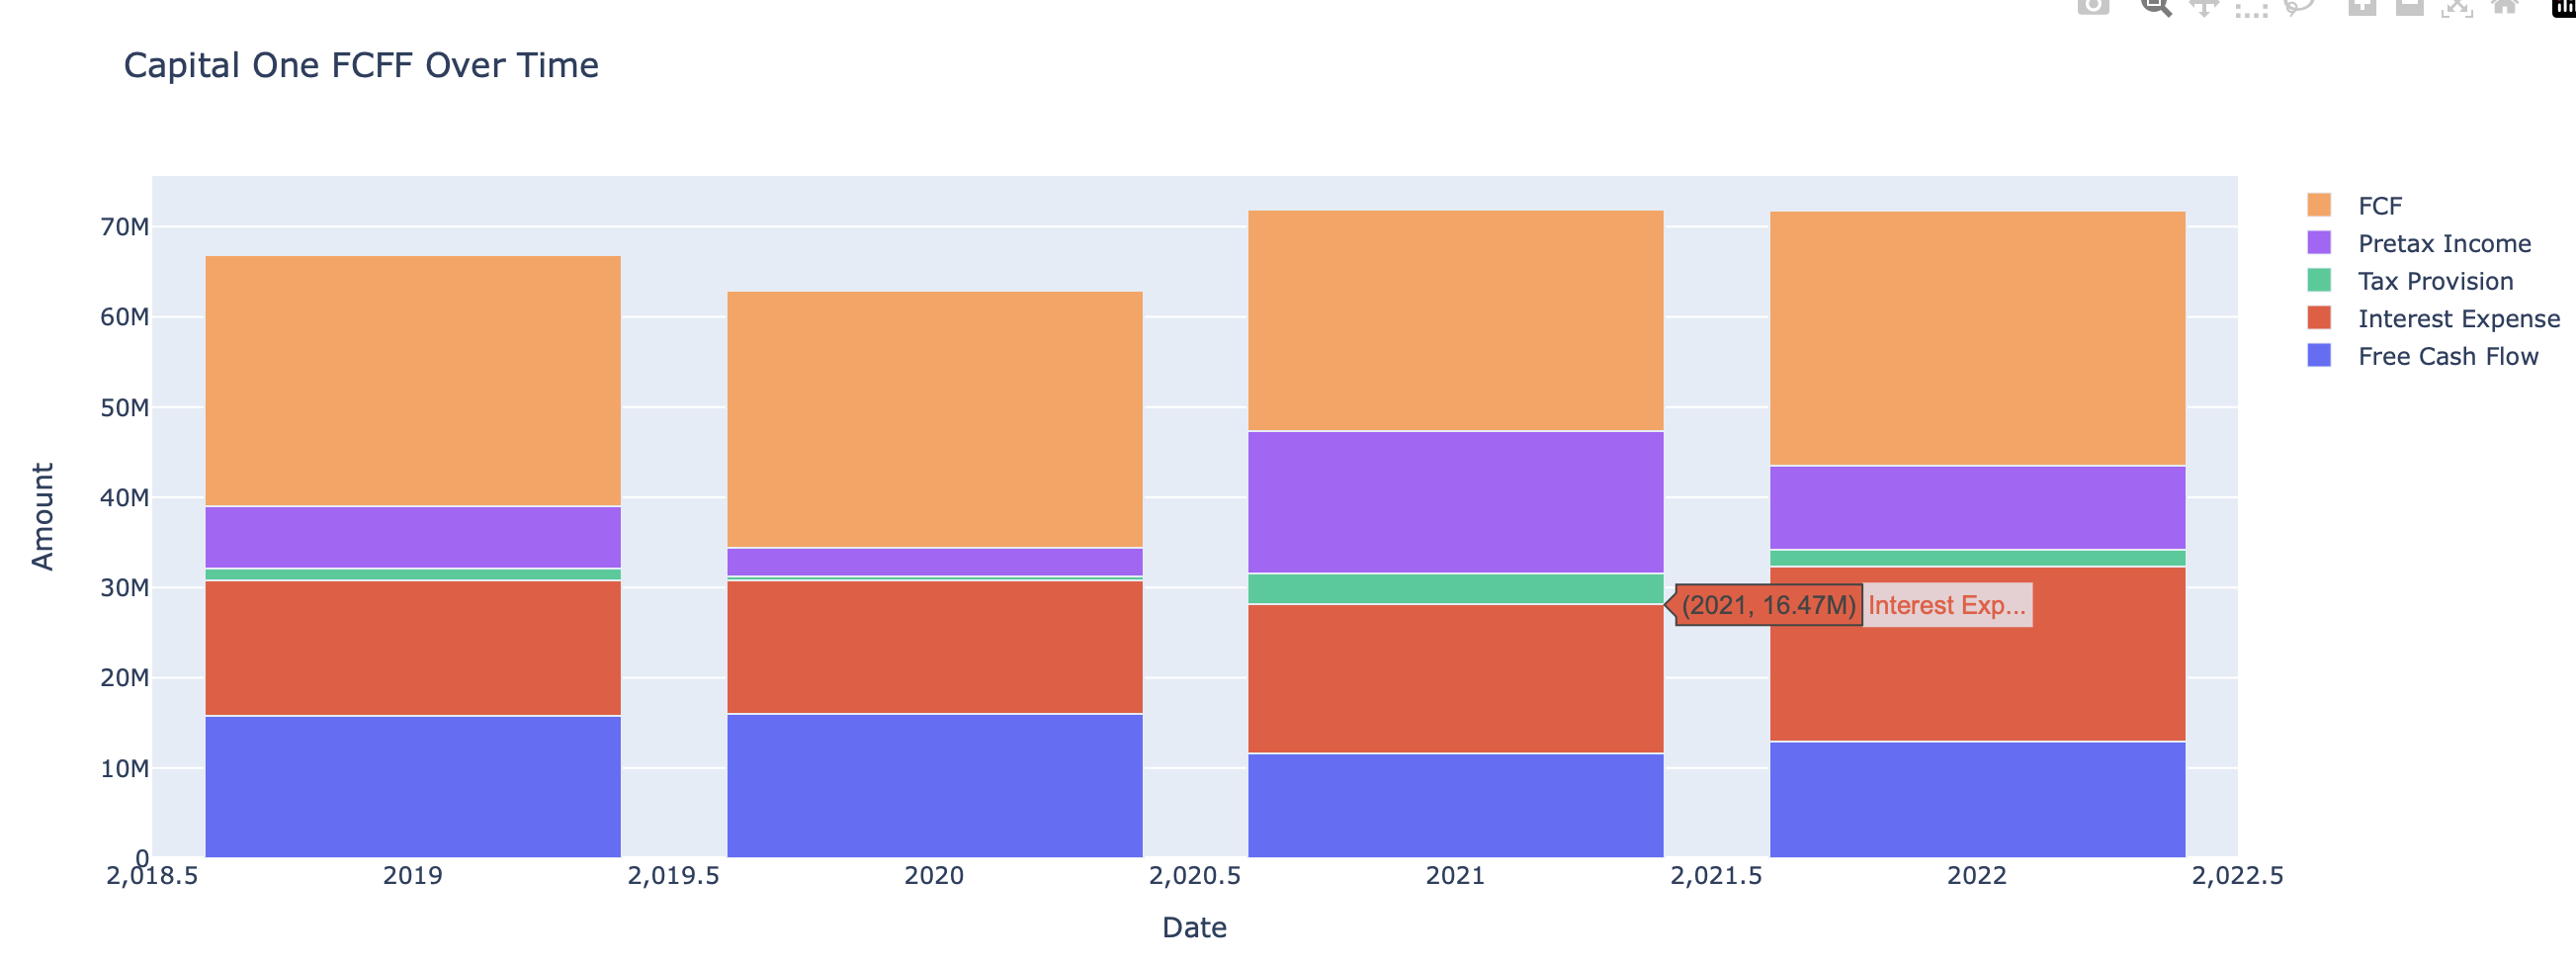



---


---




# 6. Limitiations and Assumptions

It is crucial to consider the limitations and assumptions of the calculated models. In this section, we will delve deeper into understanding how these calculations may only be somewhat reliable. For instance, the Capital Asset Pricing Model (CAPM) has some significant drawbacks, such as the risk-free rates being volatile and changing quickly. It is important to keep in mind that assuming a risk-free rate is false since investors cannot borrow or lend at a rate that assumes a zero-risk rate of return. Similarly, the Gordon Growth Model, or DDM, assumes that the company will grow constantly, which is a false assumption in the real world. This model may lead to undervaluing of stocks since it does not consider non-dividend factors. Lastly, the Free Cash Flow Evaluation assumes that the company has no changes in working capital and does not account for depreciation, which may not accurately represent the company's financial situation.

In terms of the analysis part, I encountered a challenge while obtaining the data. To access the Cashflows and Income Statement, I needed a Yahoo finance subscription, which required me to input the numbers into an Excel file and proceed with my calculations. Although there are better ways to handle data, this allowed me to complete the analysis.




---




# 7. Conclusions

This analysis of a COF stock relies on several financial models, including CAPM, DDM, and Free Cash Flow. It's important to note that these models have certain limitations and assumptions that may introduce some uncertainty to the calculations. The Free Cash Flow model suggests that the company generated a significant amount of cash flow in 2022, while the calculated expected loss of 85.9% is a cause for concern among investors.

It's essential for investors to approach these findings with caution and to be aware of the uncertainties inherent in the models and the challenges associated with acquiring data. To make informed investment decisions, investors should conduct comprehensive due diligence, seek professional financial advice, and consider broader factors beyond just calculated metrics.



---



# 8. References


- Aldahan, Reda. “Dividends Discount Model (DDM) in Python.” Medium, Python in Plain English, 31 Jan. 2022, python.plainenglish.io/dividends-discount-model-in-python-13c0f141a611.

- (CodingFun), Jose Manu. “Gordon Growth Model with Python.” Medium, Towards Data Science, 20 Feb. 2020, towardsdatascience.com/gordon-growth-model-with-python-c2670c8022a9.

- “Capital Asset Pricing Model (CAPM): All You Need to Know.” Nirmal Bang, www.nirmalbang.com/knowledge-center/capital-asset-pricing-model.html#:~:text=This%20model%20has%20a%20major,in%20a%20matter%20of%20days.&amp;text=Individual%20investors%20are%20not%20able,rate%20of%20return%20for%20calculations. Accessed 17 Dec. 2023.

- Donnelly, Hugh. “Stock Valuation Using Free Cash Flow to the Firm with Python.” Medium, The Startup, 20 Nov. 2020, medium.com/swlh/stock-valuation-using-free-cash-flow-to-the-firm-with-python-9a2f0e8f308f.

- “Gordon Growth Model.” Corporate Finance Institute, 9 Nov. 2023, corporatefinanceinstitute.com/resources/valuation/gordon-growth-model/#.

- Investopedia, Investopedia, www.investopedia.com/. Accessed 16 Dec. 2023.

- OpenAI. "GPT-3." OpenAI, https://www.openai.com/.
    - (Utilized for the visualizations)





---



---


